<img src="https://studenthub.atu.ie/assets/ATU_Logo.fa93bf0a.svg" alt="ATU Logo" width="300" height="100">

# **Project for 2024 Programming for Data Analytics (PFDA) module.**

# **1.0 Irish Weather**
## 1.1 Introduction / About this project
This is the project for the 2024 Programming for Data Analytics (PFDA) module. A description of the project can be found [here](https://github.com/andrewbeattycourseware/PFDA-courseware/blob/main/labs/Project%20Description.pdf). Initially, I was going to do a project on aviation but struggled to find usable datasets that were free of charge. Since we so often talk about the weather here in Ireland due to its erratic nature, I decided to explore it through analytics, touching upon as many suggestions as possible as per the project brief.

## 2.0 Imported libraries & modules:

### 2.1 [Pandas](https://pandas.pydata.org/) for data frames:
A fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 
### 2.2 [Matplotlib](https://matplotlib.org/stable/) for plotting:
A comprehensive library for creating static, animated, and interactive visualizations.
### 2.3 [Seaborn](https://seaborn.pydata.org/)
Seaborn: statistical data visualization.
### 2.4 [Numpy](https://numpy.org/)
The fundamental package for scientific computing with Python.

In [28]:
# Data frames.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

## 3.0 Athenry weather station.
For the final assignment of the module, we analyzed the weather station in Athenry, which I have chosen to use again. This station records a diverse range of data points, as listed below in 5.0. Unfortunately, the Circular Road station, which is closest to where I live, and the station in Oughterard, do not include temperature measurements, for example. The data was downloaded from this website: https://www.met.ie/climate/available-data/historical-data.

### 4.0 Load the dataset.
The dataset is loaded from the local location specified by the *file_path* variable using *pandas.read_csv()*.

In [ ]:
# Load the data sets.
file_path = r"C:\Users\User\ATU\PFDA\Project\mly1875.csv"
df = pd.read_csv(file_path, on_bad_lines='skip')

### 5.0 Explore dataset
The next step is a detailed exploration of the dataset's variables and attributes.

In [79]:
df

,Station Name: ATHENRY
0,Station Height: 40 M
1,year: - Year
2,month: - Month
3,rain: - Precipitation Amount (mm)
4,meant: - Mean Air Temperature (C)
5,maxtp: - Maximum Air Temperature (C)\t
6,mintp: - Minimum Air Temperature (C)\t
7,mnmax: - Mean Maximum Temperature (C)
8,mnmin: - Mean Minimum Temperature (C)
9,gmin: - Grass Minimum Temperature (C)


In [78]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Station Name: ATHENRY  14 non-null     object
dtypes: object(1)
memory usage: 244.0+ bytes
None


In [31]:
print(df.head(25))

                        Station Name: ATHENRY
0                       Station Height: 40 M 
1                              year:  -  Year
2                             month: -  Month
3         rain:  -  Precipitation Amount (mm)
4          meant: -  Mean Air Temperature (C)
5   maxtp: -  Maximum Air Temperature (C)\t  
6    mintp: -  Minimum  Air Temperature (C)\t
7      mnmax: -  Mean Maximum Temperature (C)
8      mnmin: -  Mean Minimum Temperature (C)
9     gmin:  -  Grass Minimum Temperature (C)
10           wdsp:  -  Mean Wind Speed (knot)
11              mxgt:  -  Highest Gust (knot)
12        sun:   -  Sunshine duration (hours)
13                        ind:   -  Indicator


The three functions provided the same information, albeit in different output formats. Intriguingly, the last function, designed to display the first 25 records of the dataset, unexpectedly only returned the header data (We'll get to that below). However, we do learn the station's name, altitude, and 13 available data parameters, each presented with both its abbreviation and full name.

### 5.1 Cleaning the dataset.
Since this dataset was used for an assignment previously we knew that the data had to be normalized. This is the reason why even though we have used *print(df.head(25))* above the output wouldn't reflect the first 25 records because the csv values do start in row 20 only. So let's skip the first 20 rows.


In [81]:
df = pd.read_csv(file_path, skiprows=19)

df

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,2010,3,5.5,13.9,-5.7,9.9,1.1,73.3,-6.4,6.8,45,
1,2010,4,8.8,18.5,-1.8,13.8,3.9,76.8,-2.3,6.3,40,
2,2010,5,10.4,24.5,0.2,15.6,5.2,38.4,-0.3,6.1,28,
3,2010,6,14.7,22.1,4.3,19.5,9.9,28.3,3.6,6.6,28,
4,2010,7,15.1,20.0,6.9,18.2,12.0,155.5,7.3,7.7,37,
...,...,...,...,...,...,...,...,...,...,...,...,...
172,2024,7,14.6,22.2,6.3,19.0,10.3,71.5,3.6,5.9,26,
173,2024,8,14.7,21.7,5.8,18.4,11.0,159.0,2.4,7.6,33,
174,2024,9,12.9,24.0,2.1,17.0,8.7,46.6,-0.2,6.5,33,
175,2024,10,11.0,19.1,-0.5,14.8,7.1,112.7,-2.8,6.7,51,


In [82]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    177 non-null    int64  
 1   month   177 non-null    int64  
 2   meant   177 non-null    float64
 3   maxtp   177 non-null    float64
 4   mintp   177 non-null    float64
 5   mnmax   177 non-null    float64
 6   mnmin   177 non-null    float64
 7   rain    177 non-null    object 
 8   gmin    177 non-null    object 
 9   wdsp    177 non-null    float64
 10  maxgt   177 non-null    int64  
 11  sun     177 non-null    object 
dtypes: float64(6), int64(3), object(3)
memory usage: 16.7+ KB
None


In [88]:
print(df.head(25))

    year  month  meant  maxtp  mintp  mnmax  mnmin   rain   gmin  wdsp  maxgt  \
0   2010      3    5.5   13.9   -5.7    9.9    1.1   73.3   -6.4   6.8     45   
1   2010      4    8.8   18.5   -1.8   13.8    3.9   76.8   -2.3   6.3     40   
2   2010      5   10.4   24.5    0.2   15.6    5.2   38.4   -0.3   6.1     28   
3   2010      6   14.7   22.1    4.3   19.5    9.9   28.3    3.6   6.6     28   
4   2010      7   15.1   20.0    6.9   18.2   12.0  155.5    7.3   7.7     37   
5   2010      8   13.6   23.0    1.8   17.9    9.3   60.9    4.2   6.7     34   
6   2010      9   13.5   22.6    4.8   17.1   10.0  155.0    3.0   7.0     43   
7   2010     10    9.7   19.3   -3.1   13.9    5.6   71.9   -3.8   7.0     36   
8   2010     11    4.7   14.9   -7.5    8.1    1.2  130.1   -8.6   7.4     53   
9   2010     12   -1.0   11.5  -15.8    2.8   -4.7   32.3  -10.2   4.4     30   
10  2011      1    3.1   12.1   -6.3    6.6   -0.4  110.8   -9.9   5.7     37   
11  2011      2    6.4   14.

After excluding the initial 20 rows, the dataset comprises 177 rows and 12 columns. Data type analysis reveals 3 object columns, 3 integer columns (int64), and 6 float columns (float64).

In [87]:
print(df.tail(25))

     year  month  meant  maxtp  mintp  mnmax  mnmin   rain   gmin  wdsp  \
152  2022     11    8.8   16.4   -1.8   11.9    5.7  156.2   -6.3   7.5   
153  2022     12    3.4   13.4   -8.1    6.7    0.2  114.3  -11.7   5.8   
154  2023      1    6.0   13.0   -6.0    8.9    3.1  113.9  -11.3   7.2   
155  2023      2    7.3   14.4   -3.9   10.4    4.2   42.0   -8.1   7.7   
156  2023      3    7.3   15.6   -2.2   10.7    4.0  185.9   -6.5   7.4   
157  2023      4    9.2   20.4   -1.2   13.5    4.9   93.4   -6.4   7.1   
158  2023      5   12.6   23.1    1.6   17.5    7.7   63.5   -1.2   5.9   
159  2023      6   16.7   27.0    7.3   21.8   11.6   93.8    2.1   6.1   
160  2023      7   14.8   22.0    6.6   18.2   11.4  224.1    2.9   6.9   
161  2023      8   15.4   24.9    6.6   19.1   11.7  129.1    4.7   6.8   
162  2023      9   14.6   27.7    3.8   19.1   10.2  148.2    1.7   6.1   
163  2023     10   11.0   20.7   -0.3   14.7    7.4  179.9   -3.1   6.2   
164  2023     11    7.6  

The data frame spans from March 2010 to November 2024. To ensure a consistent time frame for analysis we will work with full years only, hence excluding data for 2010 & 2024.

In [34]:
df = df[df['year'].isin(range(2011, 2024))]
df

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
10,2011,1,3.1,12.1,-6.3,6.6,-0.4,110.8,-9.9,5.7,37,
11,2011,2,6.4,14.2,-3.6,10.0,2.8,146.5,-6.0,7.7,48,
12,2011,3,6.3,16.3,-4.8,11.2,1.4,44.2,-7.9,6.0,52,
13,2011,4,11.0,21.8,2.0,15.9,6.0,66.9,-0.7,7.1,34,
14,2011,5,11.0,18.3,4.1,14.3,7.8,117.6,0.7,11.1,47,
...,...,...,...,...,...,...,...,...,...,...,...,...
161,2023,8,15.4,24.9,6.6,19.1,11.7,129.1,4.7,6.8,33,
162,2023,9,14.6,27.7,3.8,19.1,10.2,148.2,1.7,6.1,36,
163,2023,10,11.0,20.7,-0.3,14.7,7.4,179.9,-3.1,6.2,32,
164,2023,11,7.6,13.7,-3.8,10.8,4.5,113.5,-4.1,6.8,62,


## 6.0 Statistics.
### 6.1 Rainfall statistics.
Calculate average rainfall per year.

In [35]:
# Ensure the 'rain' column is numeric.
df.loc[:, 'rain'] = pd.to_numeric(df['rain'], errors='coerce')

# Group by year and calculate average rainfall.
avg_rainfall_per_year = df.groupby('year')['rain'].mean().reset_index()

# Print the numeric output for each year's average rainfall.
print("Average Rainfall per Year:")
print(avg_rainfall_per_year)

Average Rainfall per Year:
    year        rain
0   2011  114.366667
1   2012  105.508333
2   2013   94.245455
3   2014  105.358333
4   2015  131.316667
5   2016   89.733333
6   2017       100.0
7   2018   90.183333
8   2019       118.9
9   2020  123.483333
10  2021   93.683333
11  2022   98.208333
12  2023  132.516667


In [36]:
print(df[['wdsp', 'rain', 'meant']].dtypes)

wdsp     float64
rain      object
meant    float64
dtype: object


Plot average rainfall per year on bar charts.

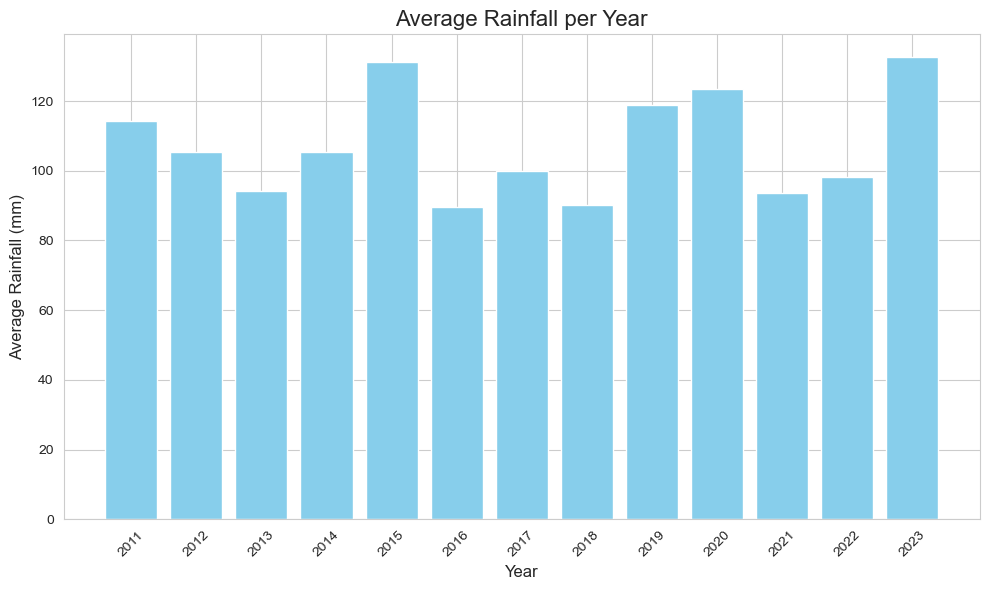

In [37]:
# Plot the bar chart for all years.
plt.figure(figsize=(10, 6))  # Set the figure size.
plt.bar(avg_rainfall_per_year['year'], avg_rainfall_per_year['rain'], color='skyblue')

# Title and labels.
plt.title('Average Rainfall per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rainfall (mm)', fontsize=12)
plt.xticks(avg_rainfall_per_year['year'], rotation=45)  # Rotate x-axis labels for better readability.

# Plot.
plt.tight_layout()
plt.show()

Average rainfall per year oscillates between under 100 mm in some years to way over 120 mm in other years. Let's have a look at the minimum and maximum averages per year.

In [38]:
# Group by year and calculate average, max, and min rainfall.
rainfall_stats = df.groupby('year')['rain'].agg(['mean', 'max', 'min']).reset_index()

# Print the numeric output for each year's rainfall statistics.
print("Rainfall Statistics per Year:")
print(rainfall_stats)

Rainfall Statistics per Year:
    year        mean    max   min
0   2011  114.366667  160.3  44.2
1   2012  105.508333  175.6  30.5
2   2013   94.245455  220.3  36.9
3   2014  105.358333  182.5  10.4
4   2015  131.316667  299.4  44.9
5   2016   89.733333  145.2  49.2
6   2017       100.0  157.7  13.5
7   2018   90.183333  173.2  25.2
8   2019       118.9  297.3  46.1
9   2020  123.483333  248.5  46.8
10  2021   93.683333  167.3  23.9
11  2022   98.208333  199.3  39.0
12  2023  132.516667  224.1  42.0


Create plot to display mean minimum and maximum in bar charts and overlay with line chart for average.

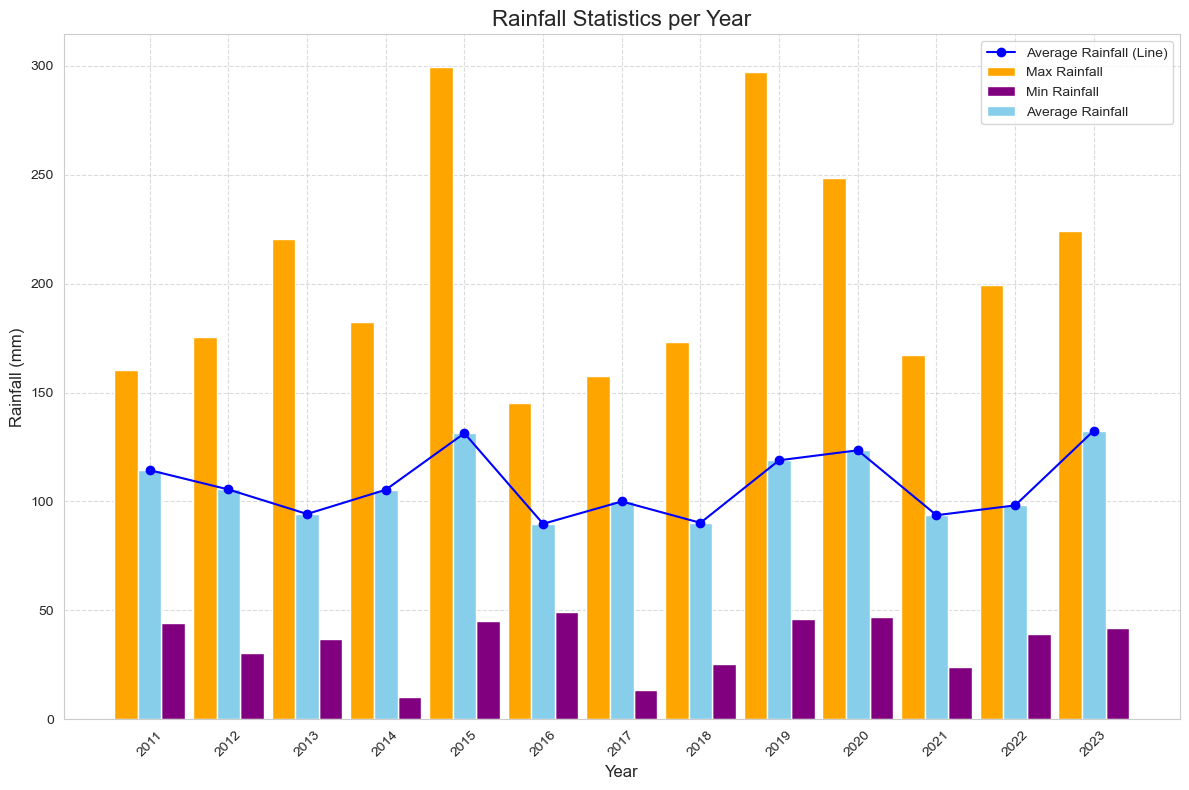

In [39]:
# Plot.
plt.figure(figsize=(12, 8))  # Set the figure size.

# Bar chart for max rainfall.
plt.bar(rainfall_stats['year'] - 0.3, rainfall_stats['max'], width=0.3, color='orange', label='Max Rainfall')

# Bar chart for min rainfall.
plt.bar(rainfall_stats['year'] + 0.3, rainfall_stats['min'], width=0.3, color='purple', label='Min Rainfall')

# Bar chart for average rainfall.
plt.bar(rainfall_stats['year'], rainfall_stats['mean'], width=0.3, color='skyblue', label='Average Rainfall')

# Line chart for average rainfall.
plt.plot(rainfall_stats['year'], rainfall_stats['mean'], marker='o', color='blue', linestyle='-', label='Average Rainfall (Line)')

# Title and labels.
plt.title('Rainfall Statistics per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)

# X-axis.
plt.xticks(rainfall_stats['year'], rotation=45)

# Legend.
plt.legend()

# Add a grid for better visualization.
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

### 6.2 Temperature statistics.
Calculate average temperature per year.

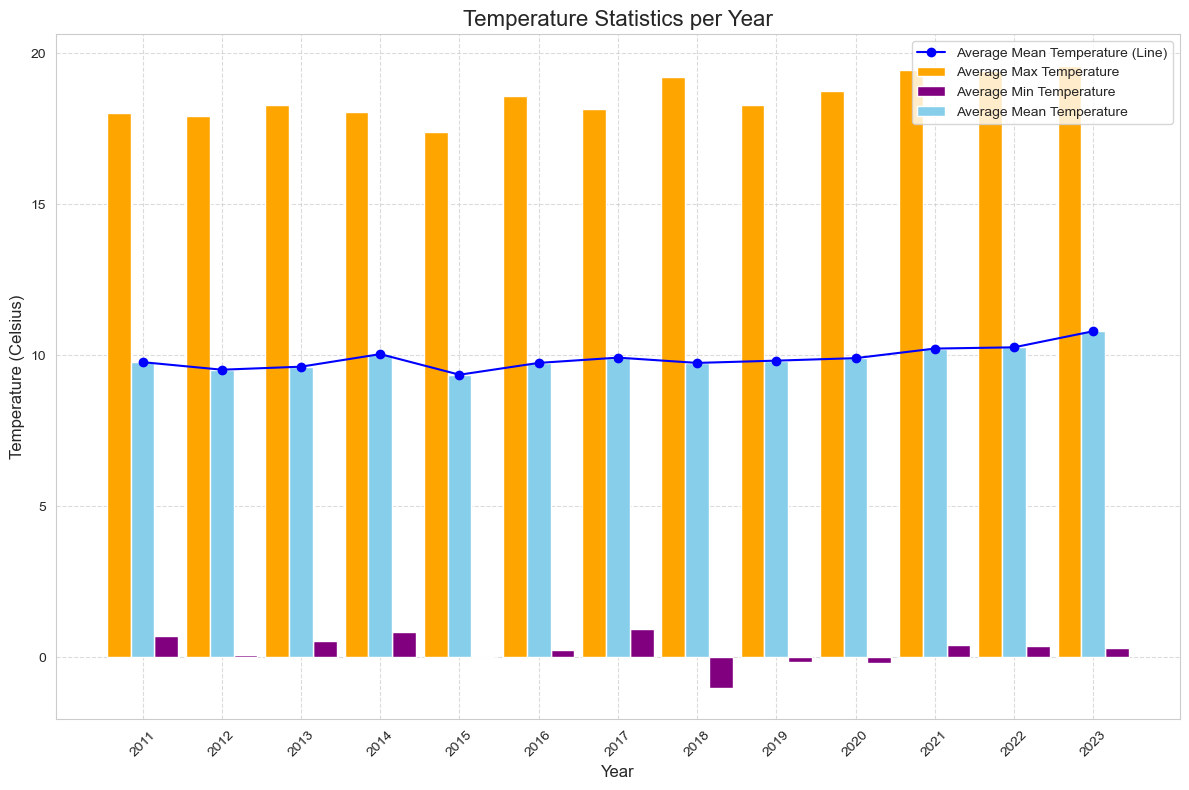

In [40]:
# Ensure the 'meant', 'maxtp', and 'mintp' columns are numeric.
df.loc[:, 'meant'] = pd.to_numeric(df['meant'], errors='coerce')
df.loc[:, 'maxtp'] = pd.to_numeric(df['maxtp'], errors='coerce')
df.loc[:, 'mintp'] = pd.to_numeric(df['mintp'], errors='coerce')

# Group by year and calculate the average temperature statistics.
temp_stats = df.groupby('year')[['meant', 'maxtp', 'mintp']].mean().reset_index()

# Plot.
plt.figure(figsize=(12, 8))  # Set the figure size.

# Bar chart for max temperature.
plt.bar(temp_stats['year'] - 0.3, temp_stats['maxtp'], width=0.3, color='orange', label='Average Max Temperature')

# Bar chart for min temperature.
plt.bar(temp_stats['year'] + 0.3, temp_stats['mintp'], width=0.3, color='purple', label='Average Min Temperature')

# Bar chart for mean temperature.
plt.bar(temp_stats['year'], temp_stats['meant'], width=0.3, color='skyblue', label='Average Mean Temperature')

# Line chart for mean temperature.
plt.plot(temp_stats['year'], temp_stats['meant'], marker='o', color='blue', linestyle='-', label='Average Mean Temperature (Line)')

# Title and labels.
plt.title('Temperature Statistics per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (Celsius)', fontsize=12)

# X-axis.
plt.xticks(temp_stats['year'], rotation=45)

# Legend.
plt.legend()

# Add a grid for better visualization.
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

### 6.3 Windspeed statistics.
Calculate average windspeed per year.

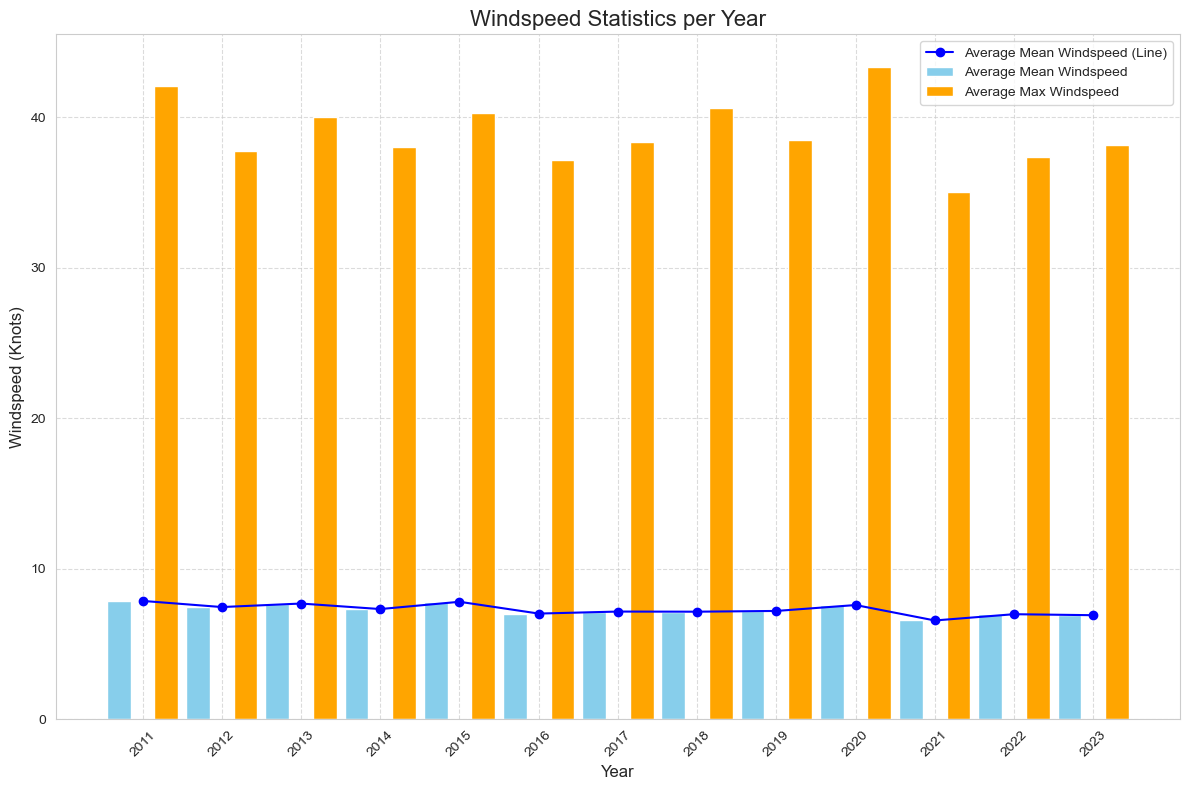

In [41]:
# Ensure the 'wdsp' and 'mxgt' columns are numeric.
df.loc[:, 'wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
df.loc[:, 'maxgt'] = pd.to_numeric(df['maxgt'], errors='coerce')

# Group by year and calculate the average temperature statistics.
wdsp_stats = df.groupby('year')[['wdsp', 'maxgt']].mean().reset_index()

# Plot.
plt.figure(figsize=(12, 8))  # Set the figure size.

# Bar chart for max temperature.
plt.bar(wdsp_stats['year'] - 0.3, wdsp_stats['wdsp'], width=0.3, color='skyblue', label='Average Mean Windspeed')

# Bar chart for min temperature.
plt.bar(wdsp_stats['year'] + 0.3, wdsp_stats['maxgt'], width=0.3, color='orange', label='Average Max Windspeed')

# Line chart for mean temperature.
plt.plot(wdsp_stats['year'], wdsp_stats['wdsp'], marker='o', color='blue', linestyle='-', label='Average Mean Windspeed (Line)')

# Title and labels.
plt.title('Windspeed Statistics per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Windspeed (Knots)', fontsize=12)

# X-axis.
plt.xticks(wdsp_stats['year'], rotation=45)

# Legend.
plt.legend()

# Add a grid for better visualization.
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

In [42]:
print(df[['wdsp', 'rain', 'meant']].dtypes)

wdsp     float64
rain      object
meant    float64
dtype: object


'rain' is an object what means that we will have to normalize the data further.

In [45]:
# Convert to numeric, handle missing values.
df.loc[:, 'rain'] = pd.to_numeric(df['rain'], errors='coerce') 
mean_rain = df['rain'].mean() 
df.loc[:,'rain'] = df['rain'].fillna(mean_rain) 

# Verify data types.
print(df.dtypes)

year       int64
month      int64
meant    float64
maxtp    float64
mintp    float64
mnmax    float64
mnmin    float64
rain     float64
gmin      object
wdsp     float64
maxgt      int64
sun       object
dtype: object


We will analyze the metrics of average rainfall, temperature, and wind speed to determine if there is any correlation among them

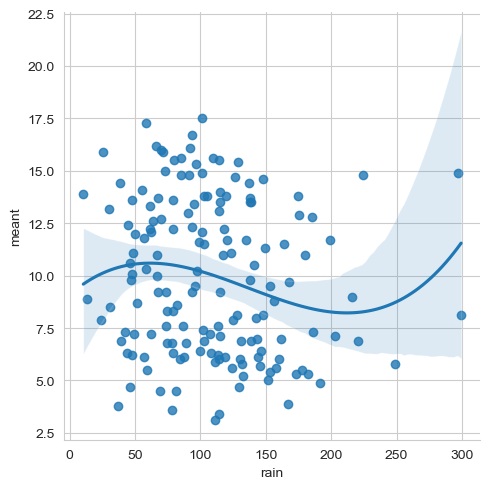

In [46]:
# Set style.
sns.set_style('whitegrid')
#sns.scatterplot(x='wdsp',y='meant',data=df)
#sns.regplot(x='wdsp', y='meant', order=3, data=df)
sns.lmplot(x='rain', y='meant', order=3, data=df)

plt.show()

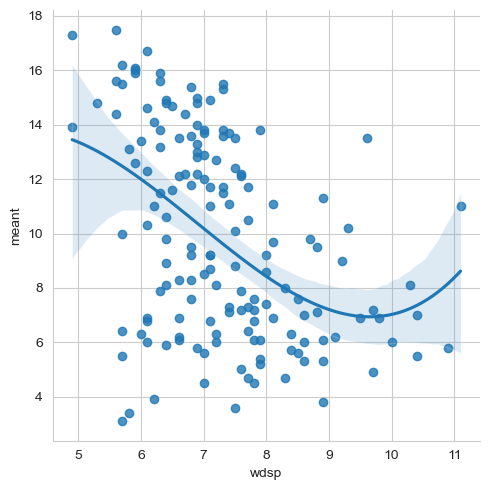

In [47]:
# Set style.
sns.set_style('whitegrid')
#sns.scatterplot(x='wdsp',y='meant',data=df)
#sns.regplot(x='wdsp', y='meant', order=3, data=df)
sns.lmplot(x='wdsp', y='meant', order=3, data=df)

plt.show()

In [48]:
print(df[['wdsp', 'rain', 'meant']].dtypes)
print(df[['wdsp', 'rain', 'meant']].isna().sum())
print(df[['wdsp', 'rain', 'meant']].info())



wdsp     float64
rain     float64
meant    float64
dtype: object
wdsp     0
rain     0
meant    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 10 to 165
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wdsp    156 non-null    float64
 1   rain    156 non-null    float64
 2   meant   156 non-null    float64
dtypes: float64(3)
memory usage: 4.9 KB
None


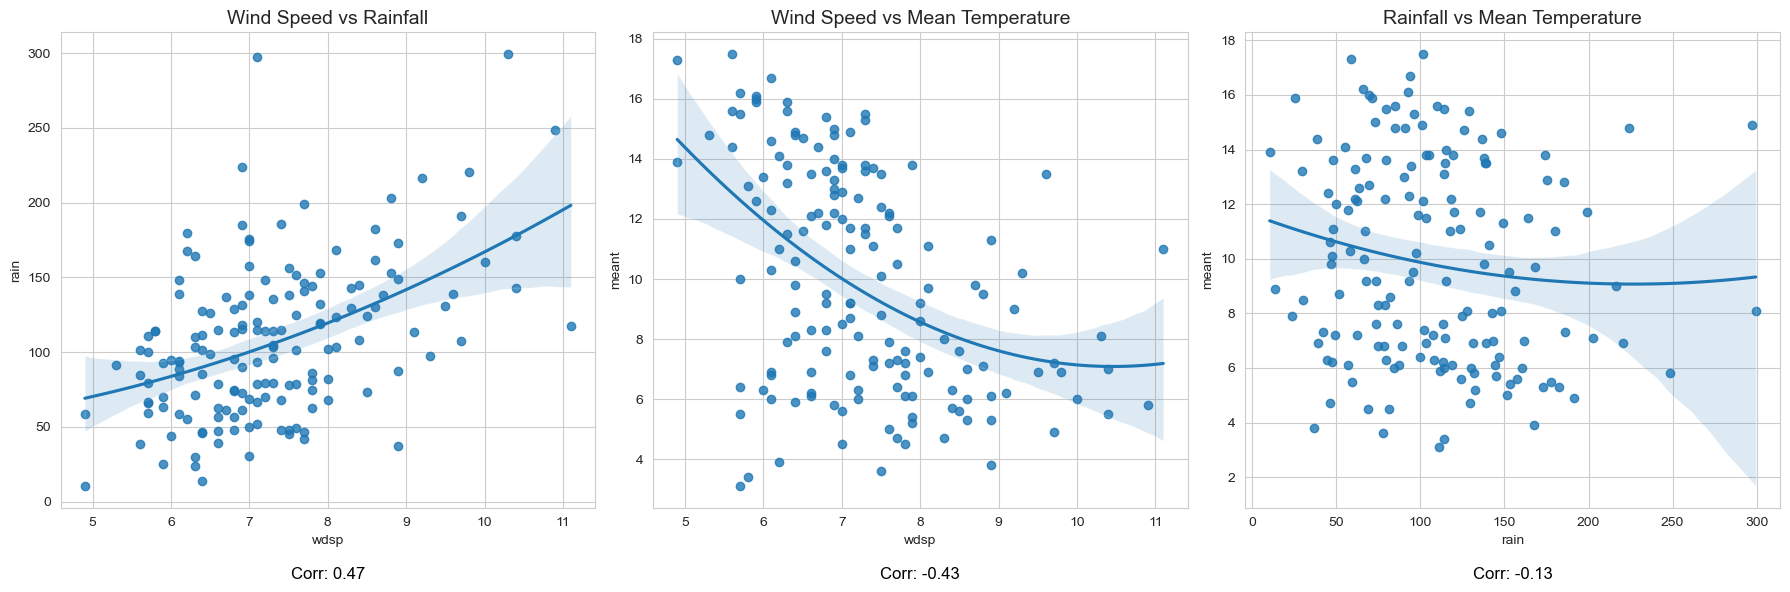

In [70]:
# Ensure columns are numeric.
df.loc[:, 'wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
df.loc[:, 'rain'] = pd.to_numeric(df['rain'], errors='coerce')
df.loc[:, 'meant'] = pd.to_numeric(df['meant'], errors='coerce')
df[pd.to_numeric(df['rain'], errors='coerce').isna()]

# Handle missing values, drop rows with NaNs etc.
df = df.dropna(subset=['wdsp', 'rain', 'meant'])
df.loc[:, 'rain'] = pd.to_numeric(df['rain'], errors='coerce')

# Set style.
sns.set_style('whitegrid')

# Create a figure with 3 subplots in a single row.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plots = [
    ('wdsp', 'rain', 'Wind Speed vs Rainfall'),
    ('wdsp', 'meant', 'Wind Speed vs Mean Temperature'),
    ('rain', 'meant', 'Rainfall vs Mean Temperature'),
]

# Loop over the axes and data.
for ax, (x, y, title) in zip(axes, plots):
    # Scatter plot with regression line.
    sns.regplot(x=x, y=y, data=df, order=2, ax=ax)
    ax.set_title(title, fontsize=14)
    
    # Calculate and display correlation coefficient.
    corr_coef = np.corrcoef(df[x].dropna(), df[y].dropna())[0, 1]
    ax.annotate(f'Corr: {corr_coef:.2f}', xy=(0.5, -0.15), xycoords='axes fraction', 
                ha='center', fontsize=12, color='black')

# Adjust layout.
plt.tight_layout()
plt.show()


In [74]:
# Group by year and calculate average, max, and min windspeed.
wdsp_stats = df.groupby('year')['wdsp'].agg(['mean', 'max', 'min']).reset_index()

# Print the numeric output for each year's windspeed statistics.
print("Windspeed Statistics per Year:")
print(wdsp_stats)

Windspeed Statistics per Year:
    year  mean  max  min
0   2010  10.0   10   10
1   2011  12.0   12   12
2   2012   8.0    8    8
3   2013  15.0   15   15
4   2014  11.0   11   11
5   2015  13.0   13   13
6   2016   9.0    9    9
7   2017  14.0   14   14
8   2018  10.0   10   10
9   2019  12.0   12   12
10  2020  11.0   11   11
11  2021  15.0   15   15
12  2022  13.0   13   13
13  2023  12.0   12   12


[13.14945055 13.30989011 13.47032967 13.63076923 13.79120879 13.95164835
 14.11208791 14.27252747 14.43296703 14.59340659 14.75384615 14.91428571
 15.07472527 15.23516484]


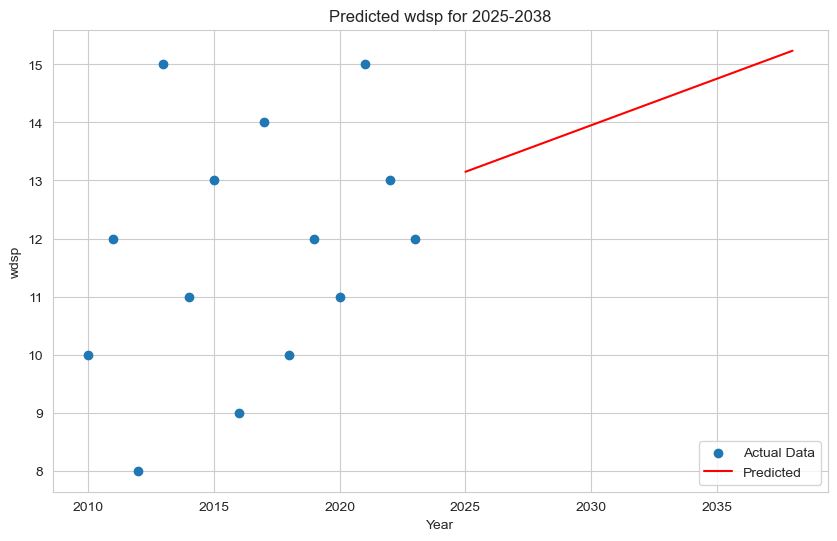

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data.
data = {'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
        'wdsp': [10, 12, 8, 15, 11, 13, 9, 14, 10, 12, 11, 15, 13, 12]}
df = pd.DataFrame(data)

# Prepare Data.
X = df[['year']]  
y = df['wdsp']  

# Create and train the model.
model = LinearRegression()
model.fit(X, y)

# Create a dataframe for future predictions.
future_years = pd.DataFrame({'year': range(2025, 2039)})

# Make predictions for future years.
future_predictions = model.predict(future_years)

print(future_predictions) 

# Plot.
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['wdsp'], label='Actual Data')
plt.plot(future_years['year'], future_predictions, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('wdsp')
plt.title('Predicted wdsp for 2025-2038')
plt.legend()
plt.grid(True)
plt.show()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html